In [52]:
import random
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [53]:
### load up some practice data with outliers in it
ages = joblib.load( open("practice_outliers_ages.pkl", "rb") )
net_worths = joblib.load( open("practice_outliers_net_worths.pkl", "rb") )

In [40]:
### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( np.array(ages), (len(ages), 1))
net_worths = numpy.reshape( np.array(net_worths), (len(net_worths), 1))
from sklearn.model_selection import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

## Slope before cleaning outliers

In [41]:
# fitting in the regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(ages_train, net_worths_train)
print("slope before removing outliers: ", reg.coef_)
print("intercept before removing outliers: ", reg.intercept_)

slope before removing outliers:  [[5.07793064]]
intercept before removing outliers:  [25.21002155]


## Score before cleaning outliers

In [42]:
# calculating the score of prediciton on test data using the trained regression model
print("score (r-squared score) on training data: ", reg.score(ages_test, net_worths_test))

score (r-squared score) on training data:  0.8782624703664672


## Visualisation before removing outliers

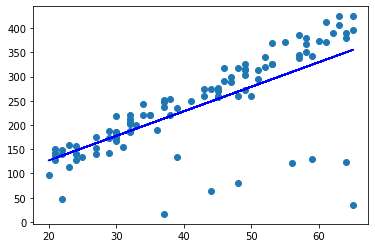

In [43]:
# visualising before removing outliers
try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()

## Cleaning the outliers

In [54]:
def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    cleaned_data = []

    ### calculating errors = actual - predicted
    errors = net_worths - predictions
    threshold = np.percentile(np.absolute(errors), 90)
        
    for age, net_worth, error in zip(ages, net_worths, errors):
        if abs(error) <= threshold:
            cleaned_data.append((age, net_worth, error))
    
    return cleaned_data

In [56]:
### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print("Your regression object doesn't exist, or isn't name reg")
    print("Can't make predictions to use in identifying outliers")

## Slope after cleaning outliers

In [58]:
ages_train_clean, net_worths_train_clean, errors_train_clean = zip(*cleaned_data)
ages_train_clean       = numpy.reshape( np.array(ages_train_clean), (len(ages_train_clean), 1))
net_worths_train_clean = numpy.reshape( np.array(net_worths_train_clean), (len(net_worths_train_clean), 1))

In [59]:
# fitting in the regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(ages_train_clean, net_worths_train_clean)
print("slope before removing outliers: ", reg.coef_)
print("intercept before removing outliers: ", reg.intercept_)

slope before removing outliers:  [[6.36859481]]
intercept before removing outliers:  [-6.91861069]


## Score after cleaning outliers

In [60]:
# calculating the score of prediciton on test data using the trained regression model
print("score (r-squared score) on training data: ", reg.score(ages_test, net_worths_test))

score (r-squared score) on training data:  0.983189455395532


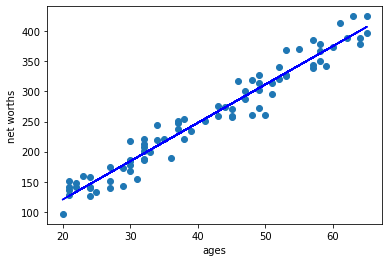

In [61]:
### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print("You don't seem to have regression imported/created,")
        print("   or else your regression object isn't named reg")
        print("   either way, only draw the scatter plot of the cleaned data")
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print("outlierCleaner() is returning an empty list, no refitting to be done")